In [23]:
import numpy as np
import json
from PIL import Image, ImageDraw
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [24]:
train_image_dir = "../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        image_paths_train.append(folder_path)

In [25]:
train_label_dir = "../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        label_paths_train.append(folder_path)

In [26]:
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

In [27]:
filter_instanceIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('instanceIds')]
filter_color = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('color')]
filter_labelIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('labelIds')]

df_label_paths_train = df_label_paths_train.drop(filter_instanceIds.index)
df_label_paths_train = df_label_paths_train.drop(filter_color.index)
df_label_paths_train = df_label_paths_train.drop(filter_labelIds.index)

In [28]:
print(len(df_image_paths_train))# X
print(len(df_label_paths_train))# y

174
174


In [29]:
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [30]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_polygons", "")
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [31]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_train

,Index,Image_Path,Target_Path
0,aachen_000079_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000079_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000079_000019_gtFine_polygons.json
1,aachen_000073_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000073_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000073_000019_gtFine_polygons.json
2,aachen_000100_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000100_000019_gtFine_polygons.json
3,aachen_000006_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000006_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000006_000019_gtFine_polygons.json
4,aachen_000037_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000037_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000037_000019_gtFine_polygons.json
...,...,...,...
169,aachen_000025_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000025_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000025_000019_gtFine_polygons.json
170,aachen_000156_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000156_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000156_000019_gtFine_polygons.json
171,aachen_000091_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000091_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000091_000019_gtFine_polygons.json
172,aachen_000050_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000050_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000050_000019_gtFine_polygons.json


# Test de code

In [49]:
file_name = df_train['Target_Path'][0]
with open(file_name, 'r') as f:
        data = json.load(f)

In [50]:
#polygon_tab = []
#for i in data['objects']:
#    if i['label'] == 'car':
#        for x, y in i['polygon']:
#            polygon_tab.append((x, y))

In [53]:
polygon_tab = []
for i in data['objects']:
    if i['label'] == 'car':
        polygon_tab.append(i['polygon'])

In [54]:
mask = np.zeros((data['imgHeight'], data['imgWidth'], 2), dtype=np.uint8)
mask_image = Image.new("L", (data['imgWidth'], data['imgHeight']), 0)

In [56]:
for i in polygon_tab:
    test_tab = []
    for x, y in i:
        test_tab.append((x, y))
    ImageDraw.Draw(mask_image).polygon(test_tab, outline=1, fill=255)

In [47]:
ImageDraw.Draw(mask_image).polygon(polygon_tab, outline=1, fill=255)

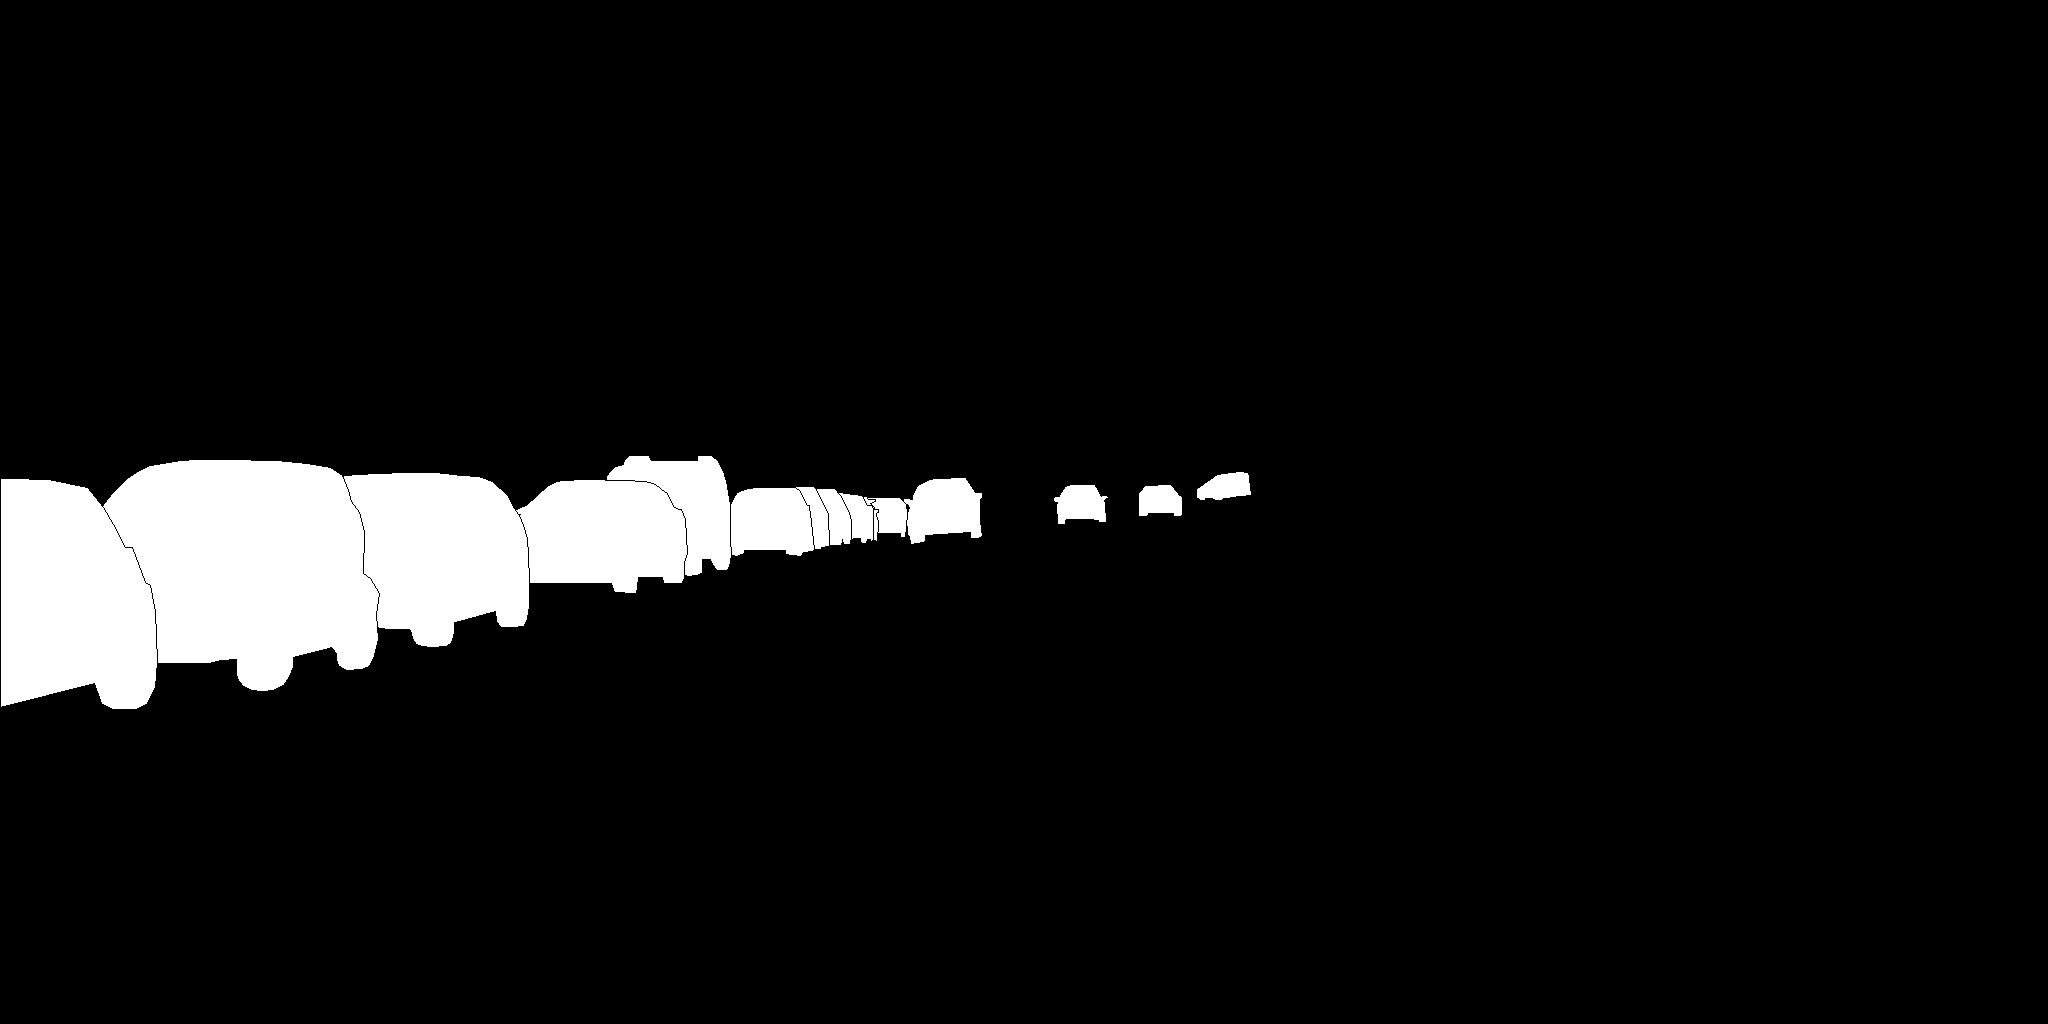

In [57]:
mask_image

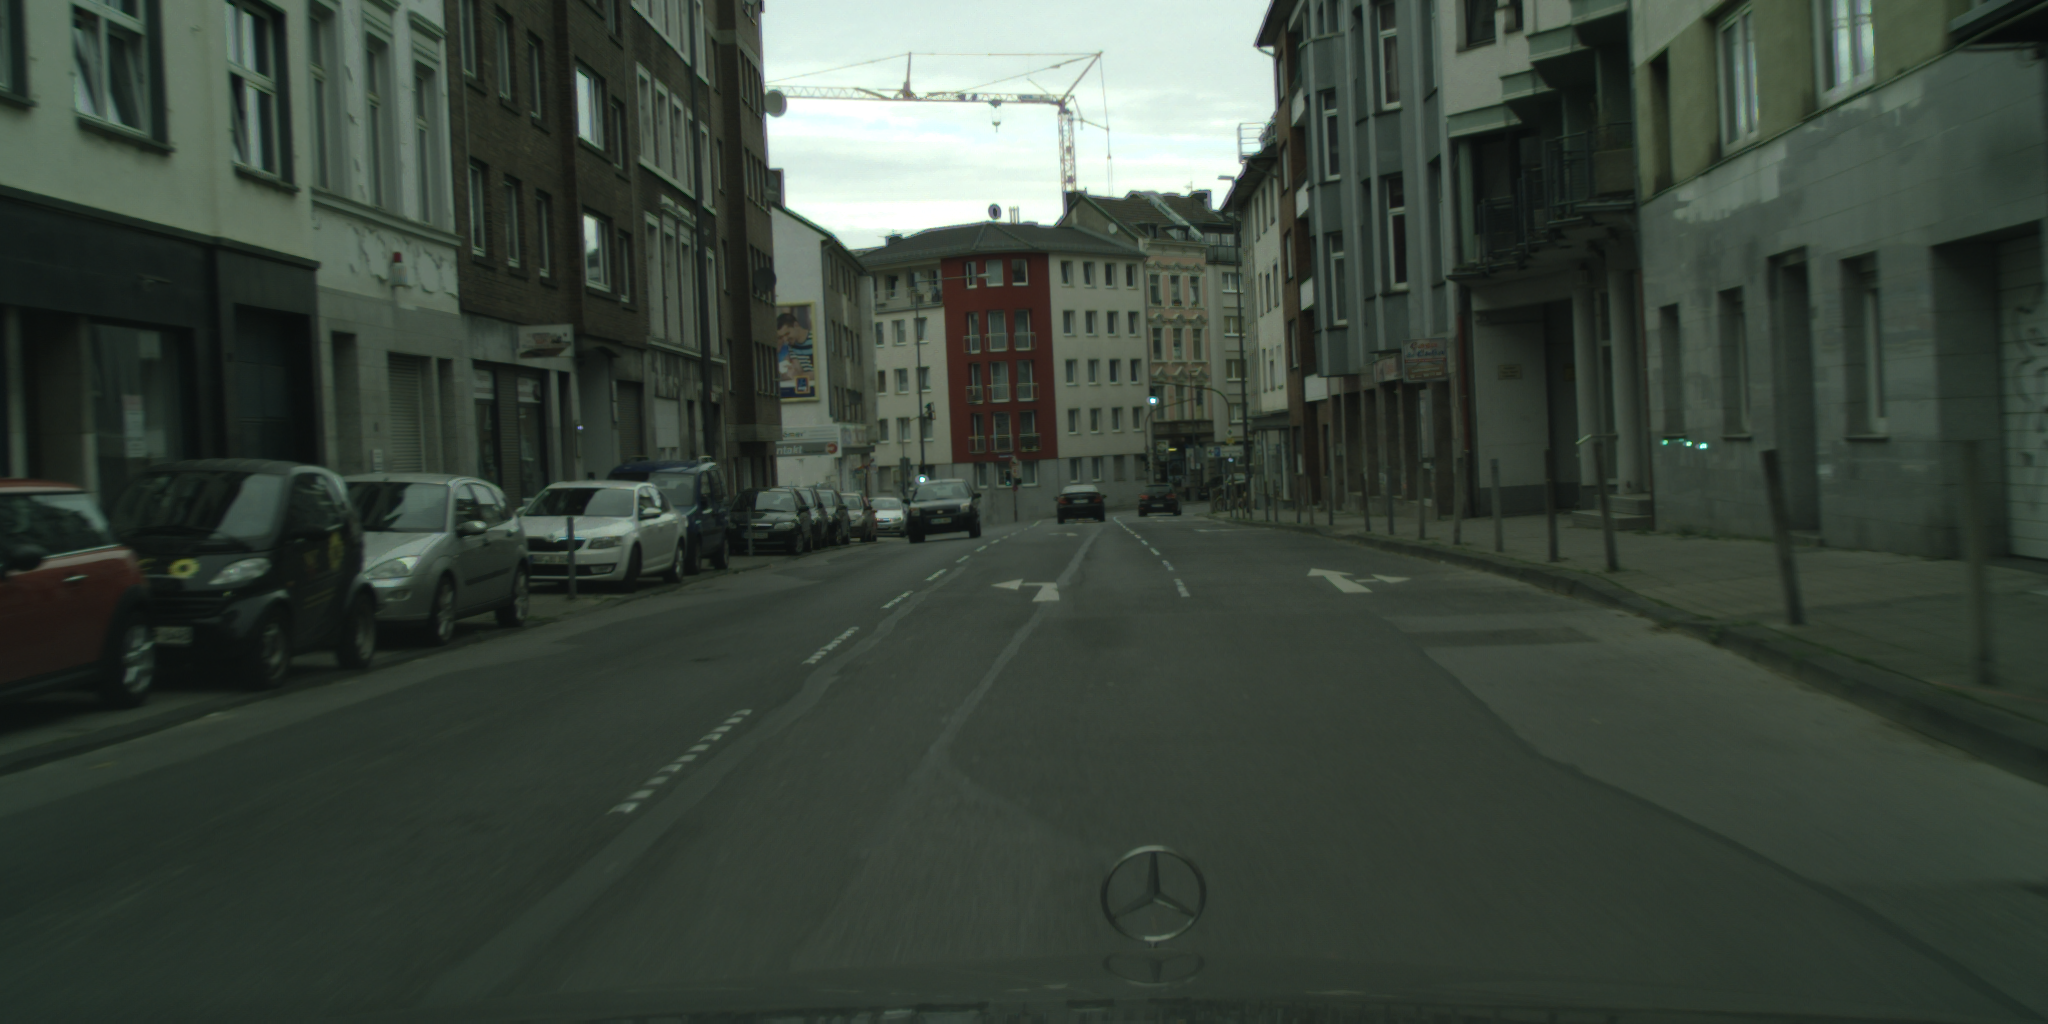

In [58]:
image1 = Image.open(df_train['Image_Path'][0])
image1

In [64]:
file_name_X = os.path.splitext(os.path.basename(df_train['Target_Path'][0]))[0]
file_name_X = file_name_X.replace("_gtFine_polygons", "")
print(file_name_X)

aachen_000079_000019


# Code final à utiliser

In [65]:
for file_target in df_train['Target_Path']:
    with open(file_target, 'r') as f:
        data = json.load(f)
    polygon_tab = []
    for ob in data['objects']:
        if ob['label'] == 'car':
            polygon_tab.append(ob['polygon'])
    mask = np.zeros((data['imgHeight'], data['imgWidth'], 2), dtype=np.uint8)
    mask_image = Image.new("L", (data['imgWidth'], data['imgHeight']), 0)
    for mask in polygon_tab:
        mask_tab = []
        for x, y in i:
            mask_tab.append((x, y))
        ImageDraw.Draw(mask_image).polygon(mask_tab, outline=1, fill=255)
    mask = np.array(mask_image)
    file_npy = os.path.splitext(os.path.basename(file_target))[0]
    file_npy = file_npy.replace("_gtFine_polygons", "")
    np.save(f"./data/{file_npy}.npy", mask)